## Customer Propensity to Purchase Model 
#### By Kevin Eddy

### Introduction
Propensity modeling encompasses various techniques for constructing predictive models that anticipate the actions of a target audience based on their historical behaviors. Basically, these models assist in gauging the probability of an individual undertaking a specific action. We can then use this likelihood or probability score to create personalized targeting campaigns for the users, thus reducing a business’ total cost (targeting only a small set of users) and increasing the ROI.

### Business Objective
The client, an early-stage e-commerce company, seeks to improve its low conversion rate by implementing a targeted discount campaign. Due to limited funds, they are exploring predictive analytics models, particularly propensity modeling and RFM modeling. Propensity modeling will predict user purchase probabilities, and RFM modeling will enhance segmentation for personalized marketing. By combining these approaches, the company aims to efficiently allocate resources, targeting users who genuinely require incentives for purchases and optimizing user engagement and retention.

### Data Description
The dataset contains the purchase history of various users over a period of time for an e-commerce company. It includes the following information about the users: demographics, customer acquisition, User Acvitity, and Category/Sub-Category features. It also contains a target variable that indicates whether the user made a purchase or not.

### Solution Approach
 - Importing the required libraries and packages
 - Read the CSV file
 - Perform data preprocessing
 - Perform exploratory data analysis
   - Univariate analysis
   - Multivariate analysis
 - Perform RFM Analysis
 - Feature engineering
 - Modeling Data Creation
 - Model building
 - Making predictions

### Import Libraries + Data File

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/Users/kevineddy/Desktop/Data Projects/Propensity Model/data/final_customer_data.xlsx')
df['DateTime'] = pd.to_datetime(df['DateTime'])
print(df.shape)
df.head()

(2090, 9)


,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
0,52243841613,d76fde-8bb3-4e00-8c23,2019-01-10 10:20:00,Electronic Appliances,Speakers,first_app_open,NaN,NaN,NaN
1,52243841613,33dfbd-b87a-4708-9857,2019-01-10 10:22:00,Electronic Appliances,Speakers,search,NaN,NaN,NaN
2,57314161118,6511c2-e2e3-422b-b695,2019-01-10 14:00:00,Men's Fashion,Jeans,search,NaN,NaN,NaN
3,57314161118,90fc70-0e80-4590-96f3,2019-01-10 14:07:00,Men's Fashion,Jeans,product_view,NaN,NaN,NaN
4,57314161118,bd7419-2748-4c56-95b4,2019-01-10 14:12:00,Men's Fashion,Jeans,read_reviews,NaN,NaN,NaN


## EDA 

Lets explore the dataset a little to become more familiar with what we're workign with.
Some questions to ask to help with this are:
 - What is the size of the dataset?
 - What is the time range of the data?
 - What is the meaning of each column and its values in the dataset?
 - What is the distribution and unique values for each column? (UniUnivariate Analysis)
 - what is the distribution and unique values for some combinations of columns? (Bivariate & Multivariate Analysis)

In [3]:
df.sample(10)

,User_id,Session_id,DateTime,Category,SubCategory,Action,Quantity,Rate,Total Price
1200,59629862188,62296ae5-6656-4093-aa4f,2019-07-11 14:50:00,School Supplies,School bags,checkout,NaN,NaN,NaN
487,51955524783,387ba75c-47bb-480a-9f86,2019-10-21 19:19:00,Gaming Accessories,Joystick,read_reviews,NaN,NaN,NaN
358,52233328559,56511c2-e2e3-422b-b695-cf,2019-10-17 19:02:00,Digital Content,Fire TV,search,NaN,NaN,NaN
994,52219601809,d1eafe50-d5d7-4a00-af3f,2019-04-11 19:36:00,Mobile & Accessories,Mobile,search,NaN,NaN,NaN
1059,52335257008,e0539f5a-5462-4a11-962e,2019-05-11 15:54:00,Mobile & Accessories,Charging wire,checkout,NaN,NaN,NaN
1851,55896688295,687fc4bb-e98e-49cb-a1el,2019-11-11 21:26:00,Baby Care,Baby lotion,product_view,NaN,NaN,NaN
1624,58481913506,ybgfvh-nth-2ec2-4571-7777,2019-10-11 10:15:00,Gifts,Gift wrappers,purchase,10.0,50.0,500.0
104,51795247161,280d577-25c8-4147-99a7,2019-03-10 23:38:00,Digital Devices,Tws earbuds,add_to_cart,NaN,NaN,NaN
1099,52732772360,b8ee17b7-bfd7-489d-9d67,2019-06-11 13:43:00,Laptop Accessories,Data cards,purchase,2.0,1500.0,3000.0
412,52240234858,028fb6-99bd-4d26-beb3-30,2019-10-19 13:13:00,Gardern and Outdoor,Water hose pipe,purchase,5.0,500.0,2500.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   User_id      2090 non-null   int64         
 1   Session_id   2090 non-null   object        
 2   DateTime     2090 non-null   datetime64[ns]
 3   Category     2090 non-null   object        
 4   SubCategory  2090 non-null   object        
 5   Action       2090 non-null   object        
 6   Quantity     201 non-null    float64       
 7   Rate         201 non-null    float64       
 8   Total Price  201 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 147.1+ KB


## Univariate Analysis

### Time Range of Data

In [5]:
print("Min Date: " + str(df.DateTime.min()))
print('\nMax of Date: ' + str(df.DateTime.max()))
print('\nRange of Date: ' + str(df.DateTime.max()-df.DateTime.min()))

Min Date: 2019-01-01 11:00:00

Max of Date: 2019-12-22 17:52:00

Range of Date: 355 days 06:52:00


### Distribution of Category

Total Unique Categories: 105


Text(0, 0.5, 'Sessions')

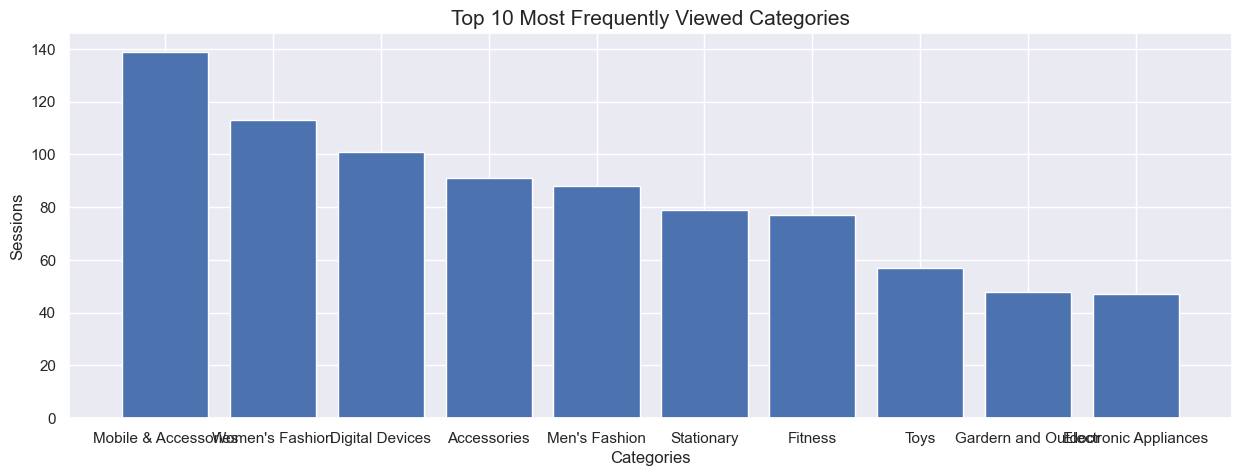

In [6]:
print('Total Unique Categories: ' + str(df.Category.nunique()))
temp_category = df.groupby('Category')['Session_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_category.Category, temp_category.Session_id)
plt.title('Top 10 Most Frequently Viewed Categories', size=15)
plt.xlabel('Categories')
plt.ylabel('Sessions')

### Distribution of SubCategory

Total Unique SubCategories: 364


Text(0, 0.5, 'Sessions')

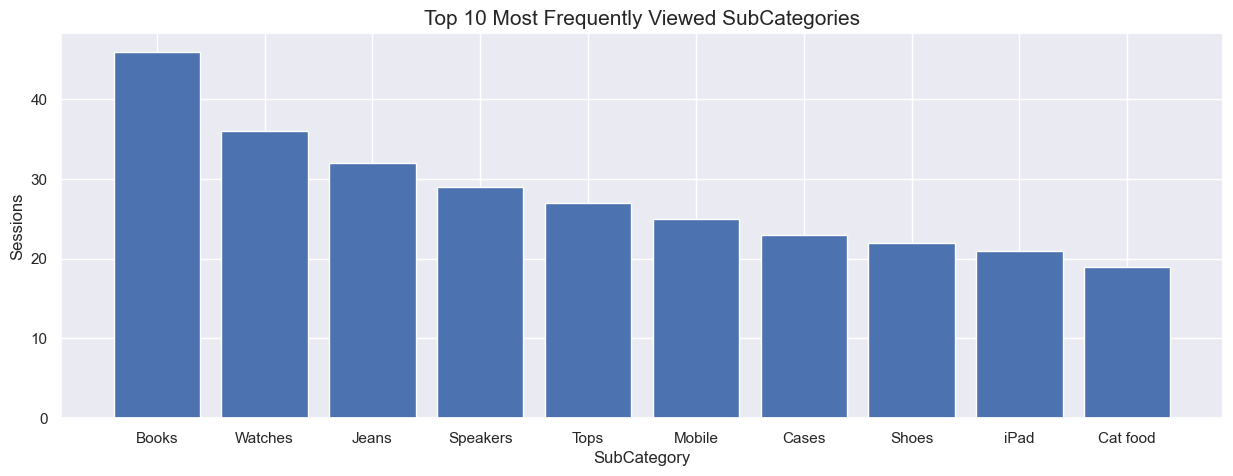

In [7]:
print('Total Unique SubCategories: ' + str(df.SubCategory.nunique()))
temp_subcategory = df.groupby('SubCategory')['Session_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_subcategory.SubCategory, temp_subcategory.Session_id)
plt.title('Top 10 Most Frequently Viewed SubCategories', size=15)
plt.xlabel('SubCategory')
plt.ylabel('Sessions')

### Distribution of Action

read_reviews           343
search                 320
product_view           292
add_to_cart            280
checkout               202
click_wishlist_page    202
purchase               201
first_app_open         121
add_review              69
add_to_wishlist         38
product_review          22
Name: Action, dtype: int64

Total Unique Actions: 11


Text(0, 0.5, 'Sessions')

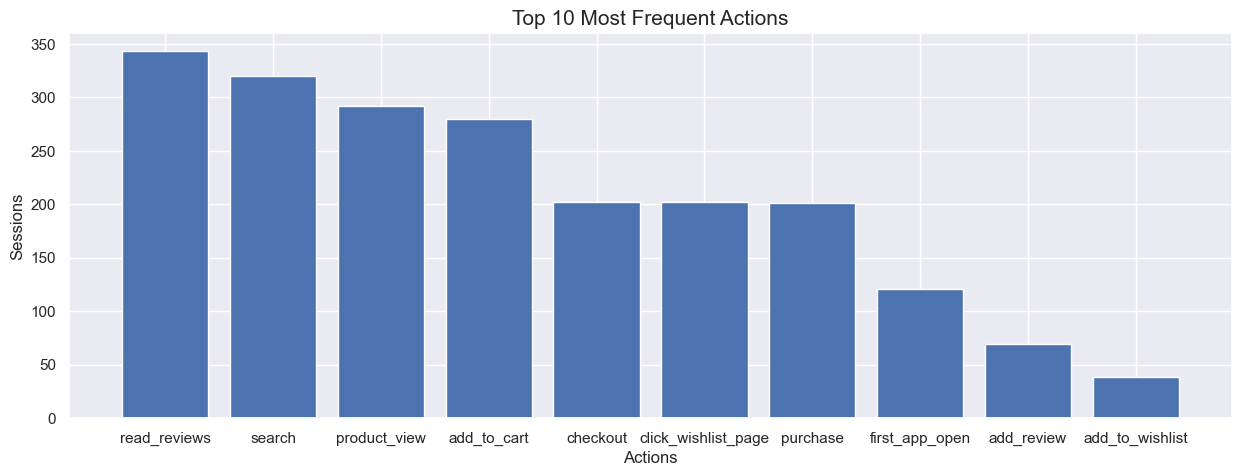

In [10]:
display(df.Action.value_counts())

df['Action'] = df['Action'].apply(lambda x: 'read_reviews' if x in ('read_review')else x)
df['Action'] = df['Action'].apply(lambda x: 'add_to_wishlist' if x in ('add_to_wishist') else x)

print('Total Unique Actions: ' + str(df.Action.nunique()))
temp_actions = df.groupby('Action')['Session_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_actions.Action,temp_actions.Session_id)
plt.title('Top 10 Most Frequent Actions', size=15)
plt.xlabel('Actions')
plt.ylabel('Sessions')

### Distribution of Quantity

Summary Stats of Quantity:


,Quantity
count,201.000000
mean,2.965174
std,7.161968
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,100.000000


Text(0.5, 1.0, 'Distribution of Quantity')

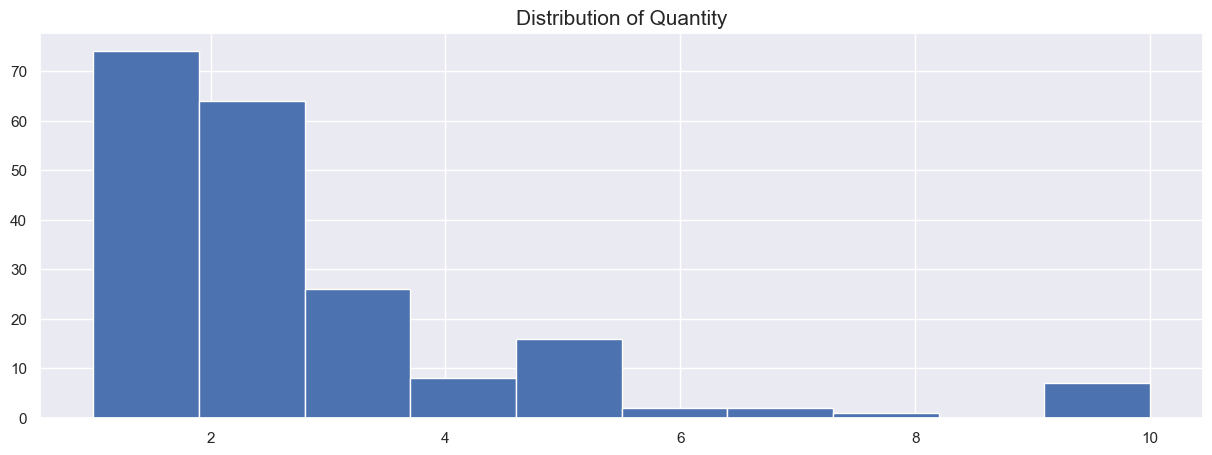

In [14]:
print('Summary Stats of Quantity:')
display(df[['Quantity']].describe())

plt.figure(figsize=(15,5))
plt.hist(df[df['Quantity']<100]['Quantity'], density=False)
plt.title('Distribution of Quantity', size=15)

### Distribution of Rate

In [17]:
print('Summary Stats of Rate:')
display(df[['Rate']].describe())

Summary Stats of Rate:


,Rate
count,201.000000
mean,7133.283582
std,14778.150668
min,10.000000
25%,500.000000
50%,1200.000000
75%,6000.000000
max,90000.000000


Total Records Less Than Or Equal To 75% Cut: 154
Total Records Greater Than Or Equal To 75% Cut: 51


Text(0.5, 1.0, 'Distribution of Rate')

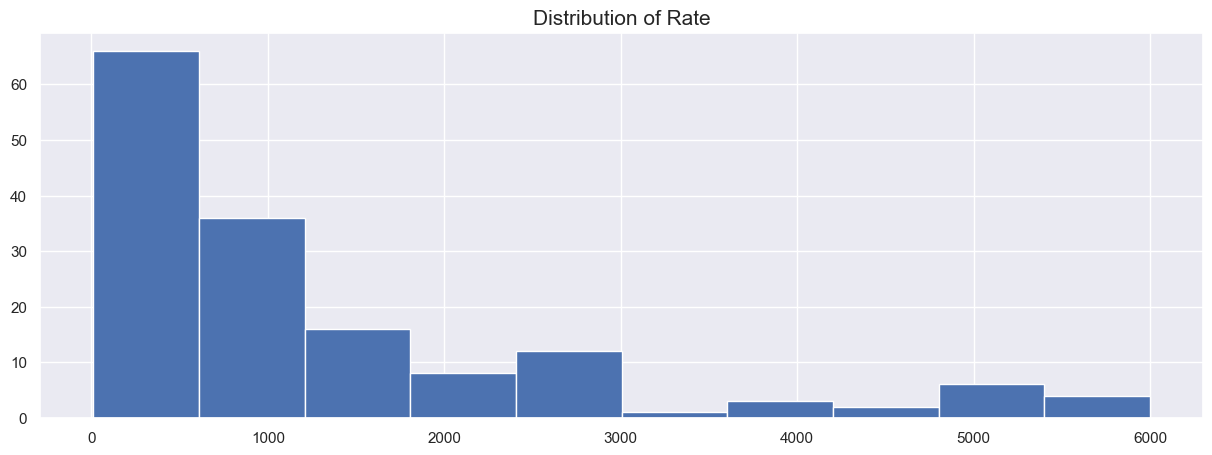

In [20]:
print('Total Records Less Than Or Equal To 75% Cut: ' + str(df[df['Rate']<=6000].shape[0]))
print('Total Records Greater Than Or Equal To 75% Cut: ' + str(df[df['Rate']>=6000].shape[0]))

plt.figure(figsize=(15,5))
plt.hist(df[df['Rate']<=6000]['Rate'],density=False, bins=10)
plt.title('Distribution of Rate', size=15)

### Distribution of Total Price

In [23]:
print('Summary Stats of Total Price')
display(df[['Total Price']].describe())

Summary Stats of Total Price


,Total Price
count,201.000000
mean,9455.373134
std,18213.695424
min,150.000000
25%,1000.000000
50%,2500.000000
75%,8000.000000
max,160000.000000


Text(0.5, 1.0, 'Distribution of Total Price')

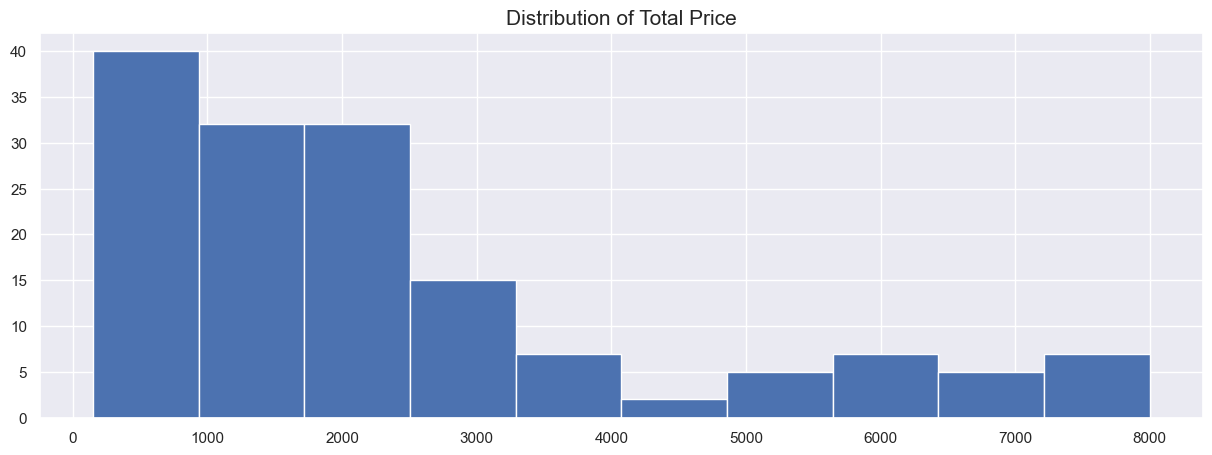

In [24]:
plt.figure(figsize=(15,5))
plt.hist(df[df['Total Price']<=8000]['Total Price'], density=False)
plt.title('Distribution of Total Price', size=15)

### Multivariate Analysis

Based on the initial understanding of the different columns in the data (univariate analysis), we can create some hypothesis (if any) or try to ask more complex questions such as:

 - How many unique users in the data and how many of them purchased atleast once? Also, what is the average number of purchase per customer?
 - Which is the most purchased Category/Sub-category?
 - Do people add the products to cart before they purchase or buy directly?
 - What is the average time taken by a user to buy a product?
 - What is the average time between repeat purchase?
 - What is the trend of unique users across the time period?
 - What is the trend of purchase across the time period?
 
 
 
 #### How many unique users in the data and how many of them purchased atleast once? Also, what is the average number of purchase per customer?

In [28]:
total_users = df.User_id.nunique()
print(f'Total customers: {total_users}')

# Customers who made atleast one purchase
atleast_one_purch = df[df['Action']=='purchase']['User_id'].nunique()
conversion = 100*round(atleast_one_purch/total_users,2)
print(f'Customers who made atleast one purchase: {atleast_one_purch} ({conversion})')

# Avg purchase per customer
avg_purchases = (df[df['Action']=='purchase'].groupby('User_id').agg({'SubCategory': 'count'}).reset_index().sort_values(by='SubCategory', ascending=False))
avg_purchases.rename(columns={'SubCategory':'no_of_purchases'}, inplace=True)

print(f'Average number of purchases per customer: {round(avg_purchases.no_of_purchases.mean(),2)}')
print('\nDistribution of Number of Purchases:')
display(avg_purchases[['no_of_purchases']].describe())

Total customers: 401
Customers who made atleast one purchase: 167 (42.0)
Average number of purchases per customer: 1.2

Distribution of Number of Purchases:


,no_of_purchases
count,167.000000
mean,1.203593
std,0.432685
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


#### Which is the most purchased Category/Sub-Category?

Total Unique Categories: 105
Total Unique SubCategories: 364


Text(0, 0.5, 'Number of Purchases')

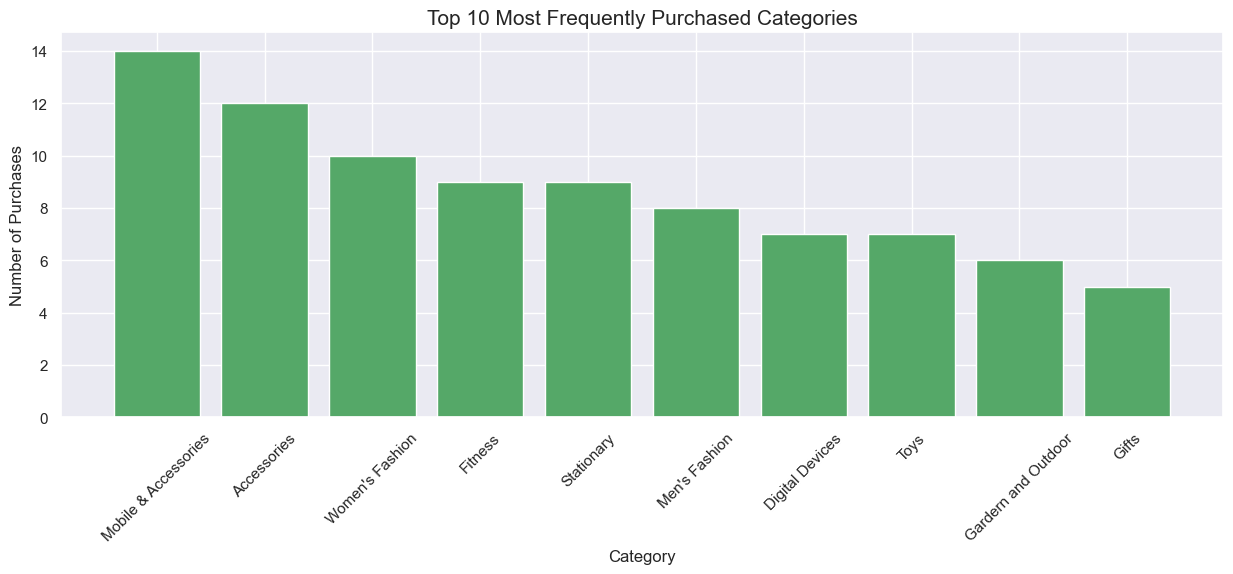

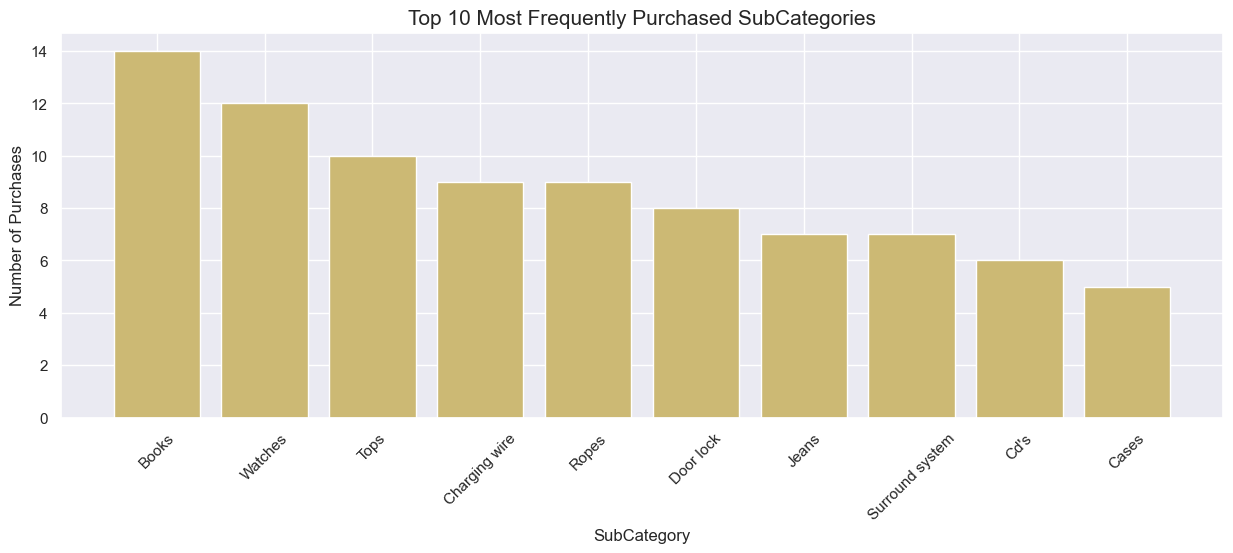

In [36]:
# Top 10 purchased category
print('Total Unique Categories: ' + str(df.Category.nunique()))
temp_category = df[df['Action']=='purchase'].groupby('Category')['User_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_category.Category, temp_category.User_id, color='g')
plt.title('Top 10 Most Frequently Purchased Categories', size=15)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Number of Purchases')

# Top 10 Purchased SubCategory
print('Total Unique SubCategories: ' + str(df.SubCategory.nunique()))
temp_subcategory = df[df['Action']=='purchase'].groupby('SubCategory')['User_id'].count().sort_values(ascending=False).reset_index()[:10]

plt.figure(figsize=(15,5))
plt.bar(temp_subcategory.SubCategory, temp_category.User_id, color='y')
plt.title('Top 10 Most Frequently Purchased SubCategories', size=15)
plt.xticks(rotation=45)
plt.xlabel('SubCategory')
plt.ylabel('Number of Purchases')

#### Do people add the products to cart before they purchase or buy directly?

In [41]:
# Distribution of users who made a purchase after adding to cart adn direct purchase
purchase_users = df[df['Action']=='purchase'].groupby('User_id')['Action'].count().reset_index()
cart_users = df[df['Action']=='add_to_cart'].groupby('User_id')['Action'].count().reset_index()

temp = pd.merge(purchase_users, cart_users, on='User_id', how='left', indicator=True)
direct_buy = temp[temp['_merge']=='left_only'].shape[0]

temp = pd.merge(cart_users, purchase_users, on='User_id', how='left', indicator=True)
cart_only = temp[temp['_merge']=='left_only'].shape[0]

print('Total unique users who purchased: ' + str(purchase_users.shape[0]))
print('Total direct buy (without adding to cart): ' + str(direct_buy))
print('Total add_to_cart buy: ' + str(cart_users.shape[0]-cart_only))

print('\nTotal unique users who added to cart: ' + str(cart_users.shape[0]))
print('Total cart only users (no purchase): ' + str(cart_only))

Total unique users who purchased: 167
Total direct buy (without adding to cart): 20
Total add_to_cart buy: 147

Total unique users who added to cart: 240
Total cart only users (no purchase): 93


#### What is the average time taken by a user to by a product?

In [45]:
print(avg_purchases.shape)
avg_purchases.head()

(167, 2)


,User_id,no_of_purchases
165,60238282834,3
17,51565158157,3
0,51448162784,2
108,53966220604,2
34,51725305614,2



Summary Stats (Time Difference in Days):


,avg_time_diff_days
count,2090.000000
mean,58.562679
std,94.365687
min,0.000000
25%,0.000000
50%,0.000000
75%,105.000000
max,335.000000


Text(0, 0.5, 'No. of Purchases')

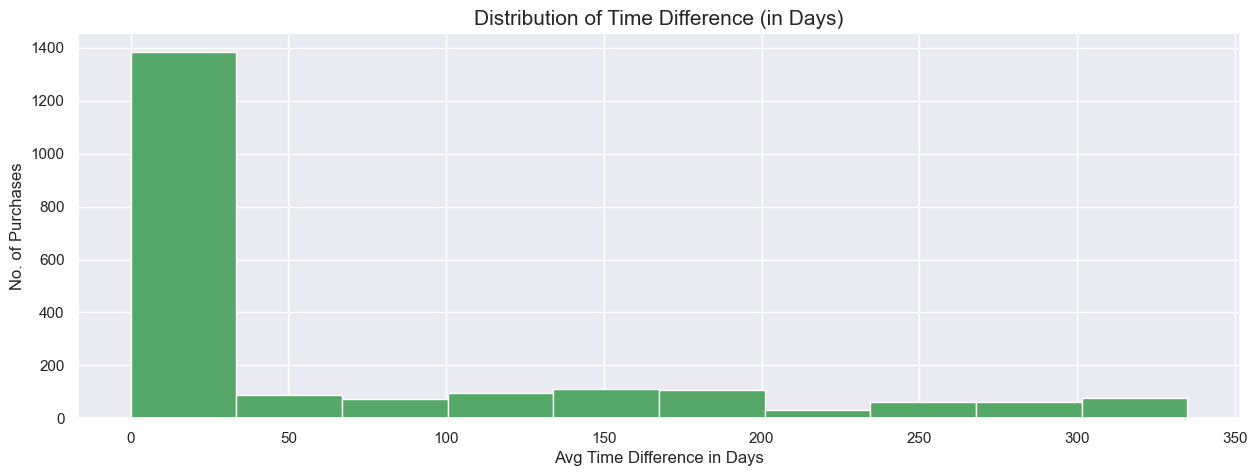

In [53]:
# Average time difference between purchases
temp = df.copy()
temp = pd.merge(temp,avg_purchases, on='User_id', how='left')
temp['no_of_purchases'] = temp['no_of_purchases'].fillna(0)

temp['min_time'] = temp.groupby('User_id')['DateTime'].transform(min)
temp['max_time'] = temp.groupby('User_id')['DateTime'].transform(max)
temp['avg_time_diff_days'] = (temp['max_time']-temp['min_time']).dt.days
temp['avg_time_diff_min'] = (temp['max_time']-temp['min_time']).dt.seconds/60

print('\nSummary Stats (Time Difference in Days):')
display(temp[['avg_time_diff_days']].describe())


plt.figure(figsize=(15,5))
plt.hist(temp['avg_time_diff_days'], density=False, color='g')
plt.title('Distribution of Time Difference (in Days)', size=15)
plt.xlabel('Avg Time Difference in Days')
plt.ylabel('No. of Purchases')


Summary Stats (Time in Minutes):


,avg_time_diff_min
count,2090.000000
mean,231.705742
std,394.751734
min,0.000000
25%,14.000000
50%,30.000000
75%,242.000000
max,1404.000000


Text(0, 0.5, 'No. of Purchases')

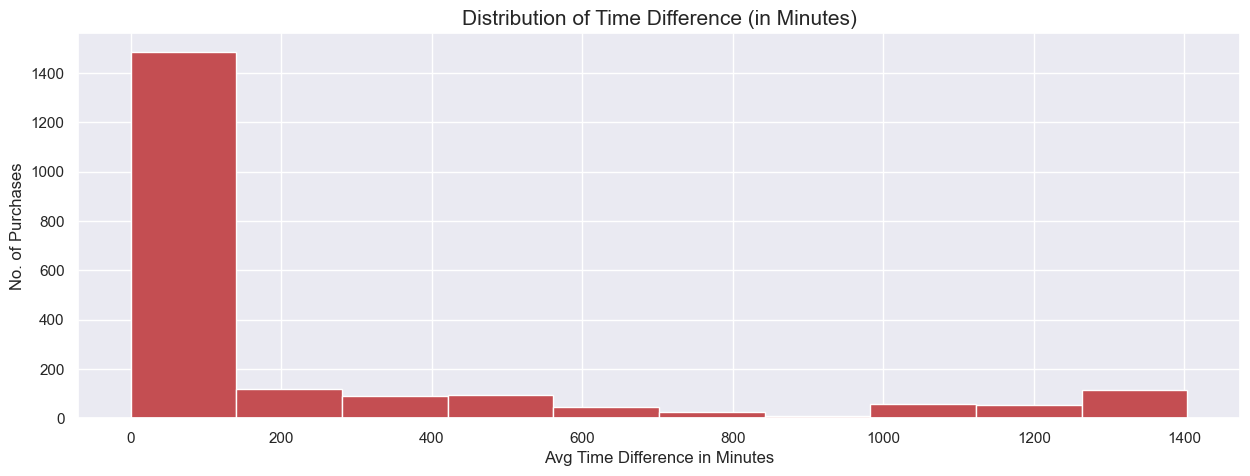

In [54]:
print('\nSummary Stats (Time in Minutes):')
display(temp[['avg_time_diff_min']].describe())


plt.figure(figsize=(15,5))
plt.hist(temp['avg_time_diff_min'], density=False, color='r')
plt.title('Distribution of Time Difference (in Minutes)', size=15)
plt.xlabel('Avg Time Difference in Minutes')
plt.ylabel('No. of Purchases')

#### What is the average time between repeat purchases?

Total Users Who Made More Than 1 Purchase: 32

Summary Stats (Time Diff in Days):


,diff
count,32.00000
mean,101.03125
std,76.81628
min,0.00000
25%,35.25000
50%,90.50000
75%,177.25000
max,245.00000


Text(0.5, 1.0, 'Distribution of TIme Difference (in Days)')

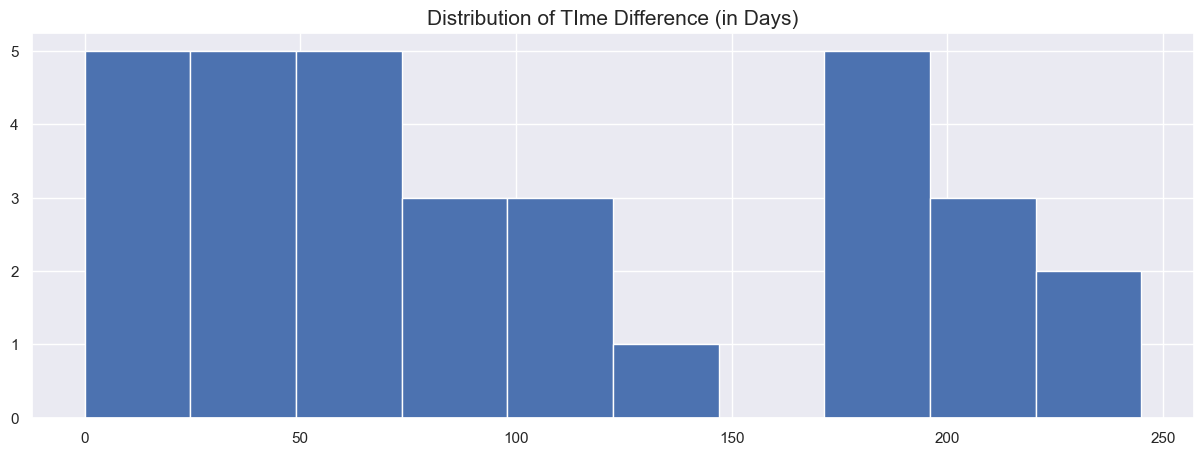

In [63]:
# Avg time between repeat purchases
temp = df.copy()
temp = pd.merge(temp, avg_purchases, on='User_id', how='left')
temp['no_of_purchases'] = temp['no_of_purchases'].fillna(0)
temp = temp[temp['no_of_purchases']>1].reset_index(drop=True)
print('Total Users Who Made More Than 1 Purchase: ' + str(temp.User_id.nunique()))

def purch_time_diff(x):
    if len(x) == 2:
        return(x[1]-x[0]).days
    if len(x) == 3:
        diff_12 = (x[1]-x[0]).days
        diff_23 = (x[2]-x[1]).days
        return (diff_12+diff_23)/2

test = temp[temp['Action']=='purchase'].sort_values(by=['User_id', 'DateTime'])
test = test.groupby('User_id').agg({'DateTime': lambda x: list(x)})
test['diff'] = test['DateTime'].apply(purch_time_diff)
test = test.reset_index()

print('\nSummary Stats (Time Diff in Days):')
display(test[['diff']].describe())


plt.figure(figsize=(15,5))
plt.hist(test['diff'], density=False, color='b')
plt.title('Distribution of TIme Difference (in Days)', size=15)

#### What is the trend of unique users across time periods?

<AxesSubplot:xlabel='Date'>

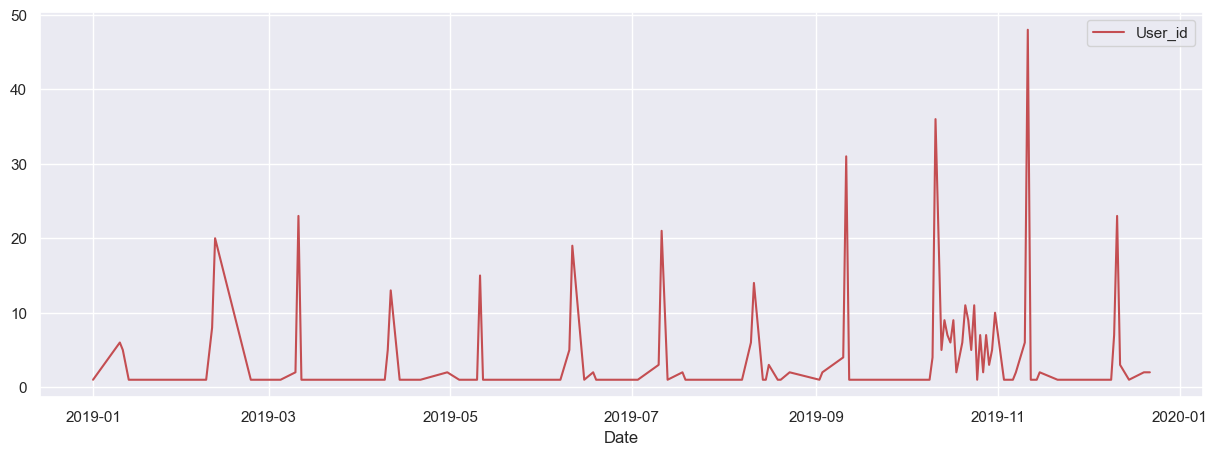

In [65]:
# Distribution of unique users across dates
temp = df.copy()
temp['Date'] = temp['DateTime'].dt.date
temp = temp.groupby('Date').agg({'User_id': 'nunique'}).reset_index().sort_values(by='Date')

temp.set_index('Date').plot(figsize=(15,5), color='r')

<AxesSubplot:xlabel='Month'>

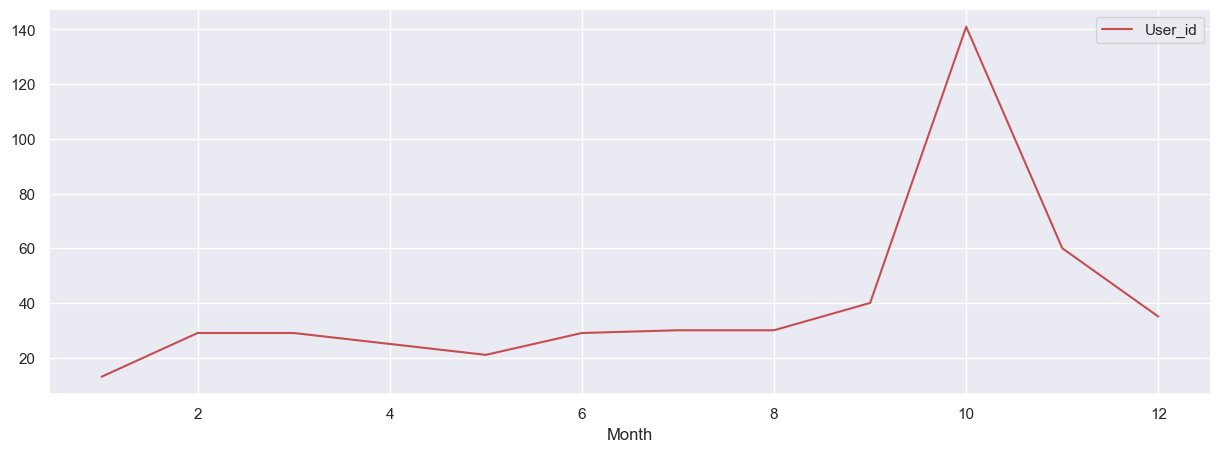

In [68]:
# Distribution of unique users across Months
temp = df.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Month'] = temp['DateTime'].dt.month
temp = temp.groupby('Month').agg({'User_id': 'nunique'}).reset_index().sort_values(by='Month')

temp.set_index('Month').plot(figsize=(15,5), color='r')

<AxesSubplot:xlabel='DayOfMonth'>

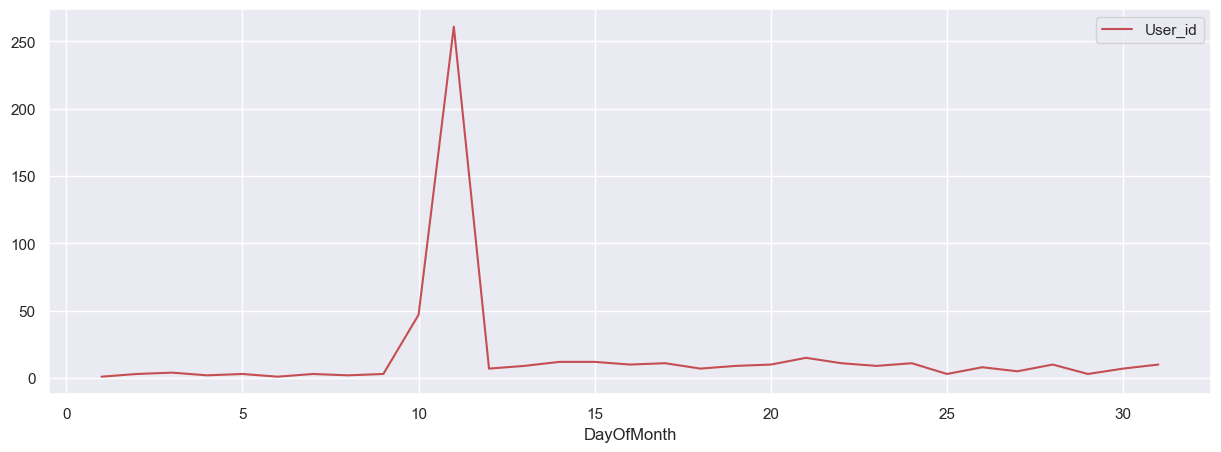

In [70]:
# Distribution of unique users across day of month
temp = df.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Month'] = temp['DateTime'].dt.month
temp['DayOfWeek'] = temp['DateTime'].dt.dayofweek
temp['DayOfMonth'] = temp['DateTime'].dt.day
temp = temp.groupby('DayOfMonth').agg({'User_id': 'nunique'}).reset_index().sort_values(by='DayOfMonth')

temp.set_index('DayOfMonth').plot(figsize=(15,5), color='r')

#### What is the trend of purchases across the time period?

<AxesSubplot:xlabel='Date'>

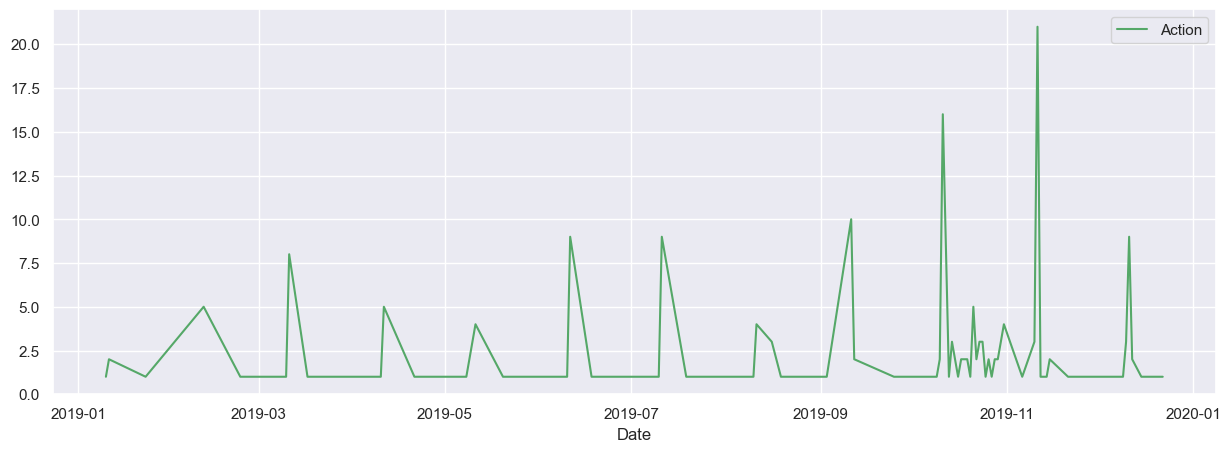

In [72]:
# Distribution of purchases across dates
temp = df.copy()
temp['Date'] = temp['DateTime'].dt.date
temp['Day'] = pd.to_datetime(temp['Date'])
temp['Month'] = temp['DateTime'].dt.month
temp['DayOfWeek'] = temp['DateTime'].dt.dayofweek
temp = temp[temp['Action']=='purchase'].groupby('Date').agg({'Action': 'count'}).reset_index().sort_values(by='Date')

temp.set_index('Date').plot(figsize=(15,5), color='g')